# CMSC471 - Artificial Intelligence - Fall 2020 
## Instructor: Fereydoon Vafaei
# <font color="blue"> Assignment 5: Regression</font>

Sam Bailor - VK96692

## Overview and Learning Objectives

In your last assignment, you are going to do some Regression exercises.

<b>Note: </b>As you work through this assignment, you are recommended to check the textbook examples, notebooks and sklearn documentations.

Pedagogically, this assignment will help you:
- better understand regression.

- practice with scikit-learn and its built-in methods, particularly regression models.

- practice model evaluation using Regression performance metrics.

## Part I - Regression with Scikit-Learn

You are going to build linear regression models to predict `adiposity` as a numeric value. This is the same dataset as in A4 but with a different target variable. First, download [the data](https://github.com/fereydoonvafaei/CMSC471-Fall2020/blob/master/SAheart.csv) and save it in your working directory. Also, import necessary Python and sklearn modules.

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

> Next, load the data with pandas. The data (csv file) should be stored in the same working directory as your notebook.

In [2]:
heart_data = pd.read_csv('SAheart.csv', sep=',', header=0, index_col=False)

In [3]:
print(heart_data.shape)
heart_data.head()

(462, 11)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## <font color="red"> Required Coding

### Preprocessing

> **Note:** Although preprocessing is extremely important to get the results of the following cells correctly, it has no points on itself because the dataset is the same as A4.

In [4]:
# The first column, row.names is useless for this ML task, drop it!
heart_data = heart_data.drop(columns=["row.names"])

print(heart_data.shape)
heart_data.head()

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
# Get the feature data types.
heart_data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

> Next, you need to convert `famhist` from categorical (Present/Absent) to numerical {0,1} for further processing in classifier.

In [6]:
 # Convert 'famhist' to pd.Categorical and then use .cat.codes to convert the values to [0,1] ~2 lines
# Hint: There might be other ways to do this using pandas dataframe methods.
# Make sure your output looks exactly like the dataframe head below, i.e. famhist values are converted to {0,1}.
heart_data["famhist"] = heart_data.famhist.astype('category').cat.codes

print(heart_data.shape)
heart_data.head()

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [7]:
type(heart_data['famhist'][0])

numpy.int8

> You're going to predict `adiposity` based on all other features (including `chd`). So your target this time is `adiposity` NOT `chd`! 

In [8]:
# Create X, y 
# Notice that X should contain all the features (columns) except 'adiposity'
# y should only include 'adiposity' because it's the target variable!
X = heart_data[["sbp", "tobacco", "ldl", "famhist", "typea", "obesity", "alcohol", "age", "chd"]]
y = heart_data["adiposity"]

print(X.shape)
print(y.shape)

(462, 9)
(462,)


> Next, split the data with a test size of 0.3

In [9]:
# Split the data to train and test using train_test_split method with test_size=0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(323, 9)
(323,)
(139, 9)
(139,)


> Next, build a [Linear Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

> Fit it on the training data, and get the $R^2$ score. $R^2$ is a measure for the quality of fit in linear regression models, and is computed as the fraction by which the variance of the errors is less than the variance of the dependent variable (target). `score()` method of the `LinearRegression` class is used to compute the $R^2$ score. Best possible $R^2$ score is 1.0. With no hyperparameter tuning, you should get an $R^2$ score higher than 0.75.

In [10]:
# Create a Linear Regression Model
reg1 = LinearRegression()

# Fit reg1 on (X_train, y_train)
reg1.fit(X_train, y_train)

print("R^2 Score = ", reg1.score(X_train, y_train))

R^2 Score =  0.752691581964259


> Next, create a Regularized Regression Model with l2, i.e. [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

In [11]:
# Create a Ridge Regression Model
reg2 = Ridge()

# Fit reg2 on (X_train, y_train)
reg2.fit(X_train, y_train)

print("R^2 Score = ", reg2.score(X_train, y_train))

R^2 Score =  0.7526915139814672


> Next, make predictions on `X_test` and compute MSE based on the predicted values `y_pred` and `y_test`.

> For this exercise, with no hyperparameter tuning, you should get an MSE less than 25 (which is too high but is not the focus of this exercise).

In [12]:
# Hint-1: When you make predictions, you don't show the y_test to the model.
# Hint-2: You can check the imported modules from sklearn at the top cell to figure out how to call MSE method.
y_pred = reg2.predict(X_test)
train_error = mean_squared_error(y_pred, y_test)

print('MSE = ', train_error)

MSE =  20.270032259117304


## Part II - Regression with Closed Form Solution

In this part, you review some of the concepts discussed in regression.

First, solve the following regression problem using closed form solution (normal equation). 

You're going to generate some data and then use closed-form solution for linear regression to fit the data.

Generate data points based on the following linear equation added by [the noise with “standard normal” distribution](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html). You may refer to the slides/textbook code snippets.

$$y = 5 + 6X + Gaussian Noise$$

## <font color="red"> Required Coding

In [13]:
X = 2 * np.random.rand(100, 1)

# Compute y based on the linear equation given above and add RANDOM GAUSSIAN noise
# Hint-1: Both the slides and the textbook have similar examples.
# Hint-2: You should NOT use rand() because it's unifrom distribution NOT Gaussian!
y = 5 + 6 * X + np.random.randn(100, 1)

print(X[0])
print(y[0])

[1.37969359]
[13.09067301]


(0.0, 2.2, 0.0, 18.0)

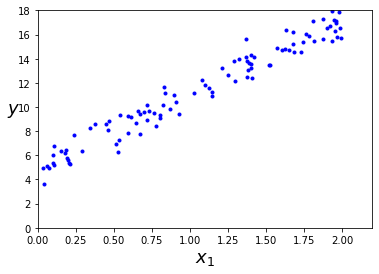

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2.2, 0, 18])

In [15]:
# add x0 = 1 to each instance using np.c_
X_b = np.c_[np.ones((100, 1)), X] 

# Compute theta_best using normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.96876906],
       [6.09765393]])

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [17]:
# Make predictions on new data by computing the dot product of X_new_b and theta_best
y_predict = X_new_b.dot(theta_best)

y_predict

array([[ 4.96876906],
       [17.16407692]])

(0.0, 2.2, 0.0, 18.0)

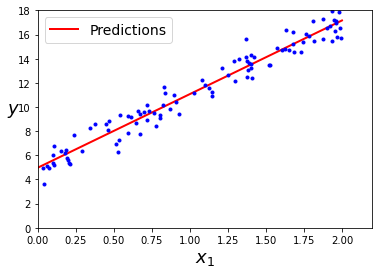

In [18]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2.2, 0, 18])

## Part III - Overfitting vs Underfitting

Next, run the cell below. Then answer the following **FOUR questions**.

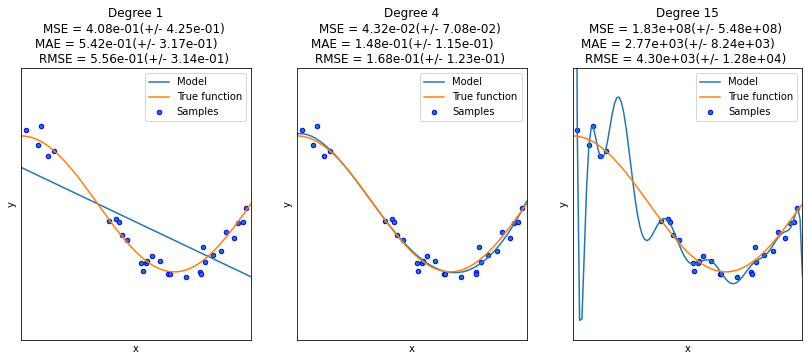

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    scoresMAE = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_absolute_error", cv=10)
    
    scoresRMSE = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_root_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e}) \nMAE = {:.2e}(+/- {:.2e}) \
    \nRMSE = {:.2e}(+/- {:.2e}) ".format(degrees[i], -scores.mean(), scores.std(),\
                                         -scoresMAE.mean(), scoresMAE.std(), \
                                         -scoresRMSE.mean(), scoresRMSE.std()))

Answer the following questions HERE:

**Q1 (5 points)** - How do you compare the three plots above in terms of their model complexity, bias and variance? Rank them in terms of complexity, bias and variance.

Answer: Plot 3 (Degree 15) has the highest variance and lowest bias. Plot 1 (Degree 1) has the lowest variance and highest bias. This is due to the bias/variance trade-off that exists within complexity.

**Q2 (5 points)** - GIVE COMPLETE ANSWER to both part(a) and (b)<br> 
(a) Which plot has overfitting? Why? What causes overfitting (if overfitting occurs in any of the plots)?

Answer (a): Plot 3 (Degree 15) has overfitting. Overfitting happens when a model is excessively sensitive to small variations in the training data (such as noise) so that it doesn't generalize well to the test data.

(b) Which one has underfitting? Why? What causes underfitting (if underfitting occurs in any of the plots)?<br>

Answer (b): Plot 1 (Degree 1) has underfitting. This is when the model is not sensitive enough to the variations in the training data, so that it doesn't accurately represent the training data or generalize to the test data.

**Q3 (5 points)** - How would you address overfitting or underfitting in each case (if there is any)? 

Answer: I would decrease the variance for overfitting and increase the variance for underfitting. The variance can be tuned with the `degree` hyperparameter in PolynomialFeatures.

**Q4 (5 points)** - GIVE COMPLETE ANSWER to both part(a) and (b)<br>
(a) What scoring has been used in applying `cross_val_score()` method on this regression model? Check [sklearn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values) and run the cell above with two other **Scoring** for **Regression**  as an argument in `cross_val_score()` method with no errors.

**Note**: Not all scores work for this problem. You should choose the scoring that works error-free. 

Answer (a): The original scores were calculated using `cross_val_score` with `neg_mean_squared_error` (which measures MSE).

(b) You can see MSE shown above the plots. Would changing the scoring, as an argument in `cross_val_score`() method, increase or decrease the error shown above the plots? Why? GIVE COMPLETE ANSWER for any of the two scoring you choose.

**Hint**: You may have to change the format of the scores in `plt.title` so that you can compare the values, for instance, from `.2e` to `.2f`.


Answer (b): I chose to use MAE and RMSE as my two other scores. At a low degree, degree 1, both MAE and RMSE increase the error compared to MSE. At a mid degree, degree 4, MSE produced a substantially higher error than either MAE or RMSE. At a high degree, degree 15, MAE increased the error and RMSE substantially increased the error compared to MSE. It appears that MSE is more resistant to increased error when a model is underfit or overfit. However, when a model is well fit, MAE and RMSE are more accurate since MSE has the highest error.

## Grading

Assignment 5 has a maximum of 50 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 50 points is as follows:

Part I implementaion has 20 points:
- 10 points: reg1
- 10 points: reg2

Notice that although preprocessing is extremely important to get the results of the following cells correctly, it has no points on itself because the dataset is the same as A4.

Part II implementation has 10 points - closed-form solution (normal equation).

Part III questions have 20 points (5 points each).

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

## Submission

Name your notebook ```Lastname-A5.ipynb```. Submit the file using the ```Assignment-5``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct results, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Monday Dec 7th, 11:59PM.</b></font>